In [1]:
import decode_eeg
import eeg_decoder
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
np.random.seed(42)
%load_ext autoreload
%autoreload 2

In [2]:
experiment_name = 'B01'
data_dir = f'./data/{experiment_name}'
exp = decode_eeg.Experiment(experiment_name,data_dir,test=False)

In [3]:
ss1,ss3 = [11,21],[13,23]
color,ori = [11,13],[21,23]

In [5]:
time_window = 50
time_step = 25
trial_average = 20
n_splits = 10
group_dict = OrderedDict([('1 Color',[11]),('3 Colors',[13])])

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [5]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata,ydata = wrangl.setup_data(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)
            interp_color = decode_eeg.Interpreter(clfr)
interp_color = decode_eeg.Interpreter(clfr,subtitle='color')
# interp_color.save_results()

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


Saving output\figures\acccolor_load.pdf
Saving output\figures\acccolor_load.png


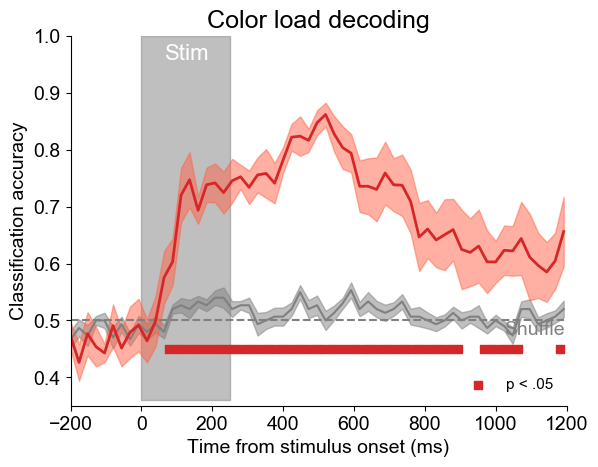

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  976 1000 1024 1048 1072 1192]
Mean delay accuracy: 0.7075277777777778
Mean delay S.D.: 0.08098008135842763


In [25]:
interp_color.labels = [1,2]
interp_color.plot_acc(significance_testing=True,savefig=True, ylim=[0.35,1],chance_text_y=.23, title='Color load decoding',subtitle='color_load')

In [6]:
time_window = 50
time_step = 25
trial_average = 20
n_splits =1000 
group_dict = {0:[21],1:[23]}

wrangl = decode_eeg.Wrangler(exp.info['times'],time_window,time_step,trial_average,n_splits,group_dict)
clfr = decode_eeg.Classification(wrangl,exp.nsub,num_labels=2)

for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)

    xdata,ydata = wrangl.setup_data(xdata,ydata)

    for X_train_all, X_test_all, y_train, y_test in wrangl.train_test_split(xdata,ydata):
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)
interp = decode_eeg.Interpreter(clfr,subtitle='ori')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [7]:
interp.save_results()

Saving output\figures\accori_load.pdf
Saving output\figures\accori_load.png


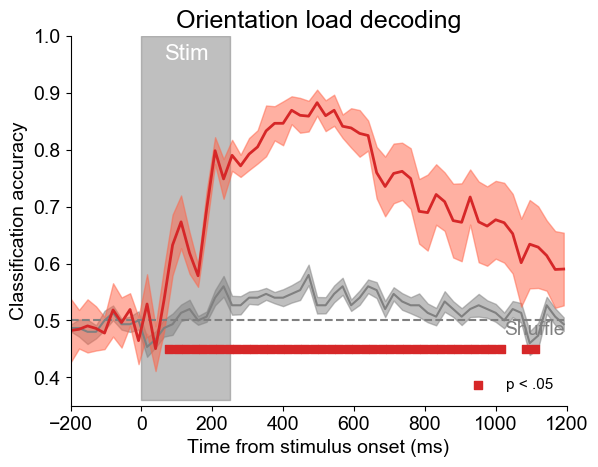

Significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1096 1120]
Mean delay accuracy: 0.7466296296296295
Mean delay S.D.: 0.08933298783791672


In [10]:
interp.labels = [1,2]
interp.plot_acc(significance_testing=True,savefig=True, ylim=[0.35,1],chance_text_y=.23, title='Orientation load decoding',subtitle='ori_load')

# compare

In [8]:
# Combine acc matrices for plotting
interp.acc = np.concatenate([interp.acc[:,np.newaxis],interp_color.acc[:,np.newaxis]],1)
interp.acc_shuff = np.concatenate([interp.acc_shuff[:,np.newaxis],interp_color.acc_shuff[:,np.newaxis]],1)

Color significant timepoints: [  88  112  136  160  184  208  232  256  280  304  328  352  376  400
  424  448  472  496  520  544  568  592  616  640  664  688  712  736
  760  784  808  832  856  880  904  928  952  976 1000 1024 1048 1072
 1096 1120 1144 1168 1192]
Color mean delay accuracy: 0.7494401960784313
Color mean delay S.D.: 0.0684695081249174
Orientation significant timepoints: [  64   88  112  136  160  184  208  232  256  280  304  328  352  376
  400  424  448  472  496  520  544  568  592  616  640  664  688  712
  736  760  784  808  832  856  880  904  928  952  976 1000 1024 1048
 1072 1096 1120 1144 1168 1192]
Orientation mean delay accuracy: 0.7199789215686273
Orientation mean delay S.D.: 0.05654272551343025
Saving output\figures\oriaccwithin_single_feature.pdf
Saving output\figures\oriaccwithin_single_feature.png


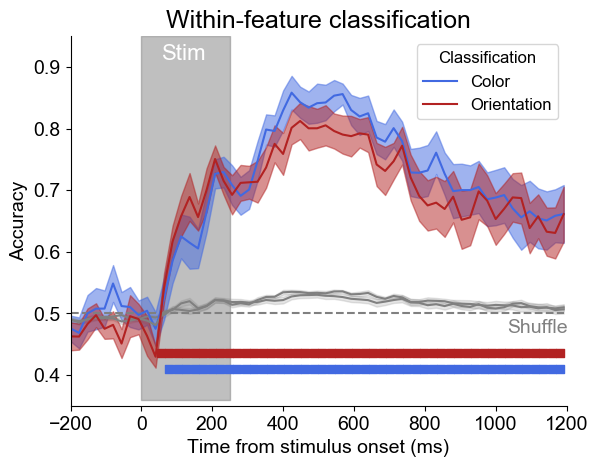

In [9]:
interp.plot_acc_subset(
    subset_list=['Color','Orientation'],
    ylim=[.35,.95], 
    chance=.5, 
    sig_ys=[.41,.435], 
    chance_text_y=.234,
    significance_testing=True,
    title='Within-feature classification',
    subtitle='within_single_feature',
    savefig=True)